In [ ]:
import pandas as pd
import re

# Загрузка данных
df = pd.read_csv('../Data/Diplomes_csv/diplomescommunes.csv')

# Получаем список всех столбцов
all_columns = df.columns.tolist()

# Создаем регулярное выражение для поиска столбцов до 1945 года
pattern = re.compile(r'(?:nodip[fh]?|bac[fh]?|sup[fh]?|per(?:bac|sup))1[0-8]\d{2}|(?:nodip[fh]?|bac[fh]?|sup[fh]?|per(?:bac|sup))19[0-3]\d|(?:nodip[fh]?|bac[fh]?|sup[fh]?|per(?:bac|sup))194[0-4]')

# Находим столбцы для удаления
columns_to_drop = [col for col in all_columns if pattern.search(col)]

# Удаляем ненужные столбцы, оставляя dep и nomdep
columns_to_keep = ['dep', 'nomdep', 'codecommune', 'nomcommune'] + [col for col in all_columns if col not in columns_to_drop]
df = df[columns_to_keep]

# Сохраняем результат
df.to_csv('cleaned_file.csv', index=False)

C:\Users\mynam\AppData\Local\Temp\ipykernel_12780\1673565856.py:5: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/Diplomes_csv/diplomescommunes.csv')


In [ ]:
# Как изменялась доля людей без диплома, с бакалавром и с высшим образованием во времени?

# Как распределяется уровень образования по регионам?

# Есть ли различия между мужчинами и женщинами?

# Какие регионы имеют наибольший/наименьший уровень образования?

C:\Users\mynam\AppData\Local\Temp\ipykernel_28872\4198526828.py:5: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/Diplomes_csv/diplomescommunes.csv')


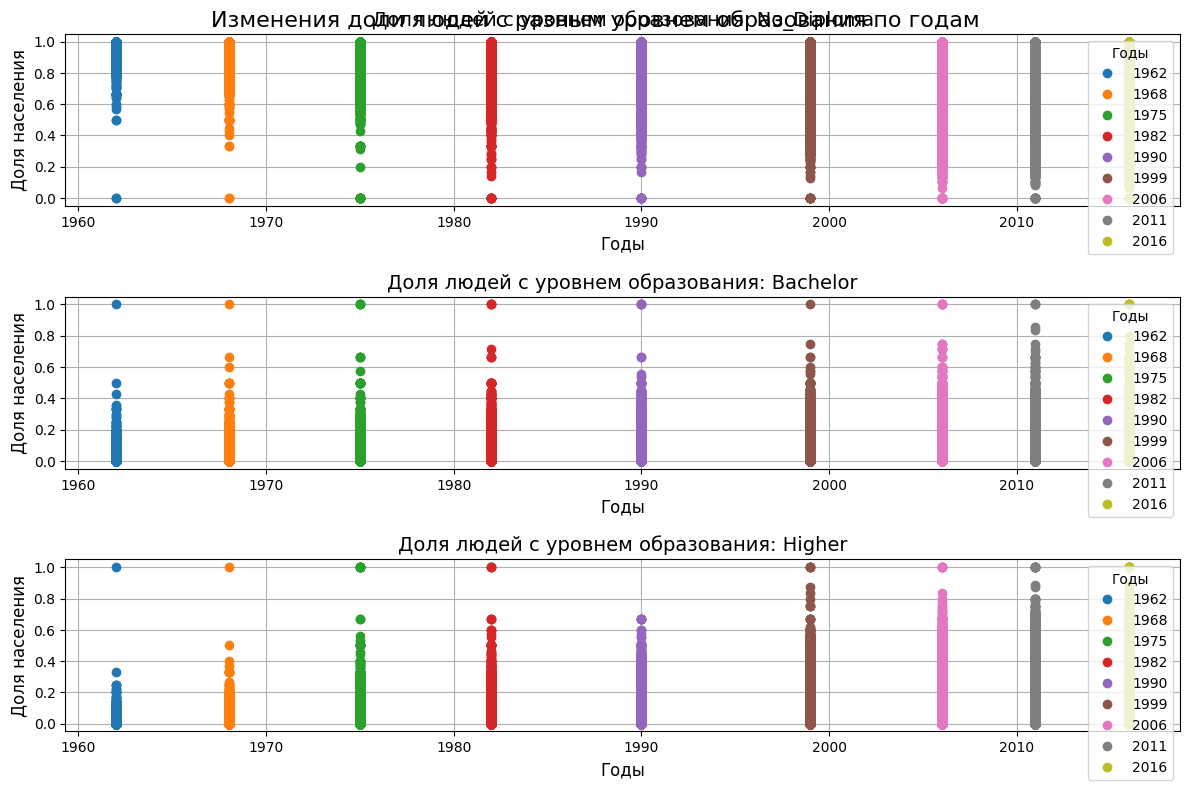

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('../Data/Diplomes_csv/diplomescommunes.csv')

# Создание новых столбцов для доли людей с разным уровнем образования
# Для каждого года мы будем использовать столбцы, например: 'nodiph1962', 'bach1962', 'suph1962' для 1962 года
# Создание новых столбцов для доли людей с разным уровнем образования
years = [1962, 1968, 1975, 1982, 1990, 1999, 2006, 2011, 2016]

education_shares = pd.DataFrame()

for year in years:
    total_population = df[f'nodip{year}'] + df[f'bac{year}'] + df[f'sup{year}']
    
    # Доля людей без диплома, с бакалавром и с высшим образованием
    education_shares[f'No_Diploma_{year}'] = df[f'nodip{year}'] / total_population
    education_shares[f'Bachelor_{year}'] = df[f'bac{year}'] / total_population
    education_shares[f'Higher_{year}'] = df[f'sup{year}'] / total_population

# Визуализация с улучшениями
plt.figure(figsize=(12, 8))

# Создание 3 субплотов (для каждой категории образования)
for i, level in enumerate(['No_Diploma', 'Bachelor', 'Higher']):
    plt.subplot(3, 1, i+1)  # 3 строки, 1 колонка, выбираем i-й субплот
    for year in years:
        plt.plot([year] * len(df), education_shares[f'{level}_{year}'], 'o', label=year, markersize=6)
    
    plt.title(f'Доля людей с уровнем образования: {level}', fontsize=14)
    plt.xlabel('Годы', fontsize=12)
    plt.ylabel('Доля населения', fontsize=12)
    plt.grid(True)
    plt.legend(title="Годы", fontsize=10)
    
# Общий заголовок для всех графиков
plt.suptitle('Изменения доли людей с разным уровнем образования по годам', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Поднимем заголовок, чтобы не перекрывался с графиками

# Показать график
plt.show()

C:\Users\mynam\AppData\Local\Temp\ipykernel_26592\1050520511.py:5: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/Diplomes_csv/diplomescommunes.csv')


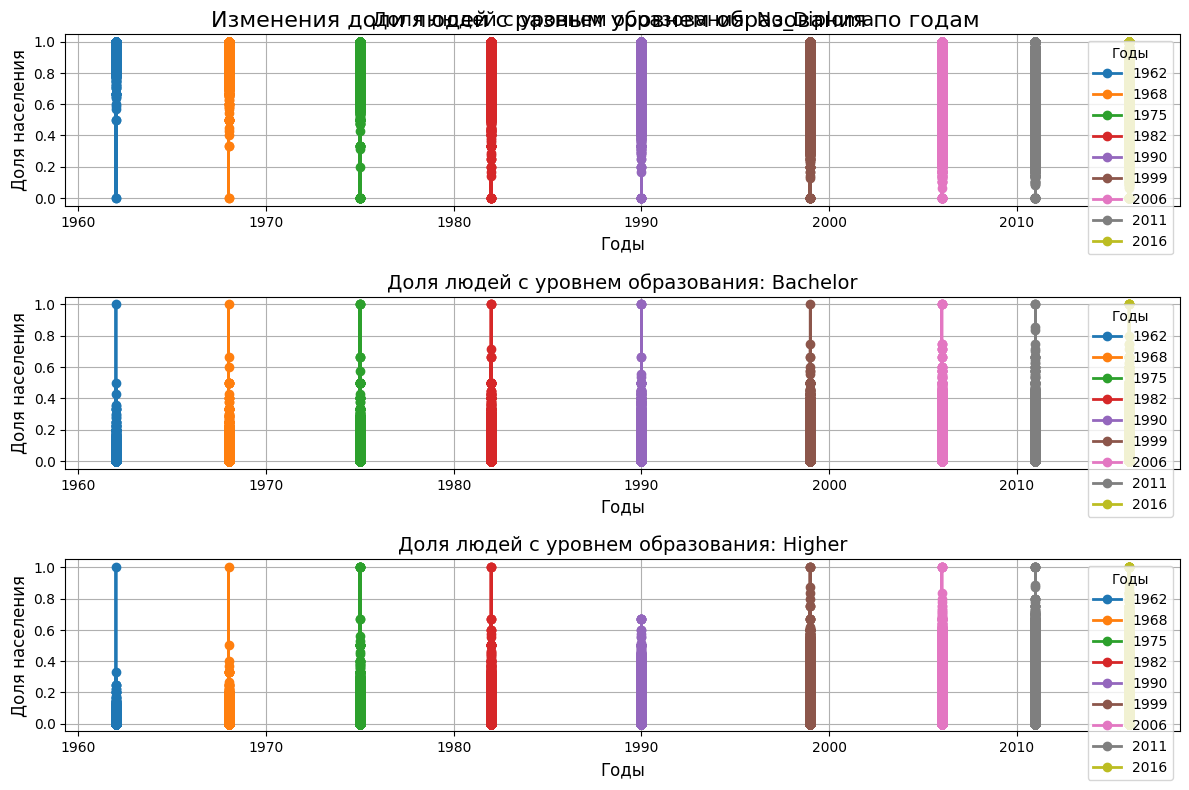

In [1]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('../Data/Diplomes_csv/diplomescommunes.csv')



C:\Users\mynam\AppData\Local\Temp\ipykernel_27764\4264261200.py:4: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/Diplomes_csv/diplomescommunes.csv')


In [2]:
df.info

<bound method DataFrame.info of       dep      nomdep codecommune             nomcommune  nodiph1962  \
0       1         AIN        1001  ABERGEMENT-CLEMENCIAT       121.0   
1       1         AIN        1002    ABERGEMENT-DE-VAREY        40.0   
2       1         AIN        1003               AMAREINS        32.0   
3       1         AIN        1004      AMBERIEU-EN-BUGEY      2241.0   
4       1         AIN        1005    AMBERIEUX-EN-DOMBES       181.0   
...    ..         ...         ...                    ...         ...   
37980  95  VAL-D'OISE       95676     VILLERS-EN-ARTHIES        60.0   
37981  95  VAL-D'OISE       95678          VILLIERS-ADAM       129.0   
37982  95  VAL-D'OISE       95680        VILLIERS-LE-BEL      4318.0   
37983  95  VAL-D'OISE       95682        VILLIERS-LE-SEC        52.0   
37984  95  VAL-D'OISE       95690    WY-DIT-JOLI-VILLAGE        96.0   

       bach1962  suph1962  nodipf1962  bacf1962  supf1962  ...  perbac1955  \
0           4.0       0.0

In [3]:
print(df.isnull().sum())

dep              0
nomdep         243
codecommune      0
nomcommune       0
nodiph1962     257
              ... 
persup1957       0
perbac1958       0
persup1958       0
perbac1959       0
persup1959       0
Length: 1163, dtype: int64


In [4]:
df_cleaned = df.dropna()

In [6]:
print(df_cleaned.isnull().sum())

dep            0
nomdep         0
codecommune    0
nomcommune     0
nodiph1962     0
              ..
persup1957     0
perbac1958     0
persup1958     0
perbac1959     0
persup1959     0
Length: 1163, dtype: int64
